# CA 3 - Banana Classification

**Group 12**: Le Uyen Nhu Dinh, Sheikh Hasan Elahi, Isma Sohail.

### Imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


### Reading data

In [53]:
df = pd.read_csv('train.csv')
df

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.825734 -0.883754  -2.423530 -1.198136    -4.286523  1.585792   
1    -0.142286 -0.708374  -2.224219  2.222650     1.896814 -4.284821   
2    -1.957254 -4.293733  -1.073703 -1.405019    -0.729812  3.930497   
3    -2.168043  3.095472   1.707717 -0.584218    -0.564767  0.014740   
4    -3.149338  3.058402   2.173671 -0.265609    -2.563220  0.376015   
...        ...       ...        ...       ...          ...       ...   
2795 -3.558241  2.238072   3.659291 -2.009616    -1.182283  2.644585   
2796 -0.674817  0.356224  -2.063503 -2.002749    -1.169246  0.710731   
2797  0.734057 -0.521849  -2.398139  3.082185     1.961583 -0.136754   
2798 -0.292535  1.418799   1.135584 -2.608716    -0.497932  2.589713   
2799 -1.626098  2.229498   3.856501  0.652745    -1.943957 -0.638567   

       Acidity  Peel Thickness  Banana Density  Quality  
0    -0.589002        0.164434    65822.758426        0  
1     1.069387        0.704945    99930.329162        0  
2    -0.397840        0.852810    37081.567982        0  
3    -0.103799        0.582909    63931.435551        1  
4     1.434252        0.102162    48711.448819        1  
...        ...             ...             ...      ...  
2795  0.974309        0.754231    73646.477562        1  
2796 -2.736048        0.901529    89393.884408        0  
2797 -1.465578        0.996692    63043.567854        1  
2798  1.105013        0.288069    98252.648370        1  
2799  2.567122        0.876047     5723.498522        1  

[2800 rows x 10 columns]

**Comments**: The dataset has 9 features and target variable "Quality" for the banana

### Data exploration and visualisation

In [54]:
# Statiscal summary:
df.describe()

Size       Weight    Sweetness     Softness  HarvestTime  \
count  2800.000000  2800.000000  2800.000000  2800.000000  2800.000000   
mean     -0.764652    -0.751050    -0.751005    -0.019557    -0.700683   
std       2.114313     2.006590     1.955109     2.076865     2.029916   
min      -7.998074    -7.103426    -6.434022    -6.959320    -7.570008   
25%      -2.249285    -2.238843    -2.104742    -1.593816    -2.112747   
50%      -0.922448    -0.882387    -0.997902     0.220174    -0.856858   
75%       0.638570     0.853566     0.334989     1.542899     0.628895   
max       5.806328     5.679692     6.438196     8.241555     5.942060   

          Ripeness      Acidity  Peel Thickness  Banana Density      Quality  
count  2800.000000  2800.000000     2800.000000     2800.000000  2800.000000  
mean      0.771011    -0.000989        0.506758    49397.491271     0.506429  
std       2.098275     2.286725        0.291936    29327.077623     0.500048  
min      -7.423155    -8.226977        0.000086     -980.343999     0.000000  
25%      -0.572589    -1.608385        0.257860    24025.427350     0.000000  
50%       0.930927     0.073963        0.506282    49303.534616     1.000000  
75%       2.229410     1.662417        0.761016    75066.598785     1.000000  
max       7.077372     6.395850        0.999430    99982.761410     1.000000

**Comment:** All features are numerical so no need for encoding. Only 'Banana Density' has a significantly diffferent scale than the other features.

In [55]:
# Missing values:
df.isnull().any()

Size              False
Weight            False
Sweetness         False
Softness          False
HarvestTime       False
Ripeness          False
Acidity           False
Peel Thickness    False
Banana Density    False
Quality           False
dtype: bool

In [56]:
# Check for duplicates:
df.duplicated().any()

np.False_

**Comment**: There is no missing values or duplicated samples in the dataset.

In [57]:
# Initialize colors to be used in this notebook.
banana_colors = {0: "#786A23", 1: "#FFD700"}  

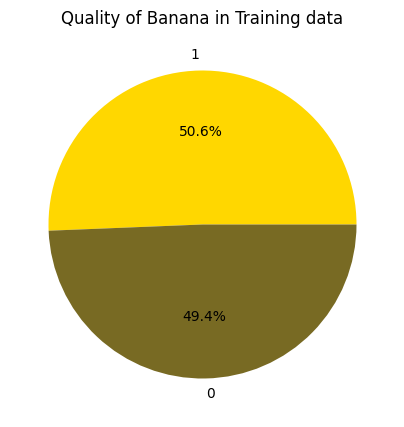

Quality
1    1418
0    1382
Name: count, dtype: int64


In [58]:
# Check the class proportion of the target 
target_counts = df['Quality'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(target_counts, autopct='%1.1f%%', labels=target_counts.index, 
        colors=list(reversed(banana_colors.values())))
plt.title('Quality of Banana in Training data')
plt.show()

print(target_counts)

**Comment**: The proportion of each class in Quality is nearly the half, good banana - 50.6% while bad banana - 49.4%.

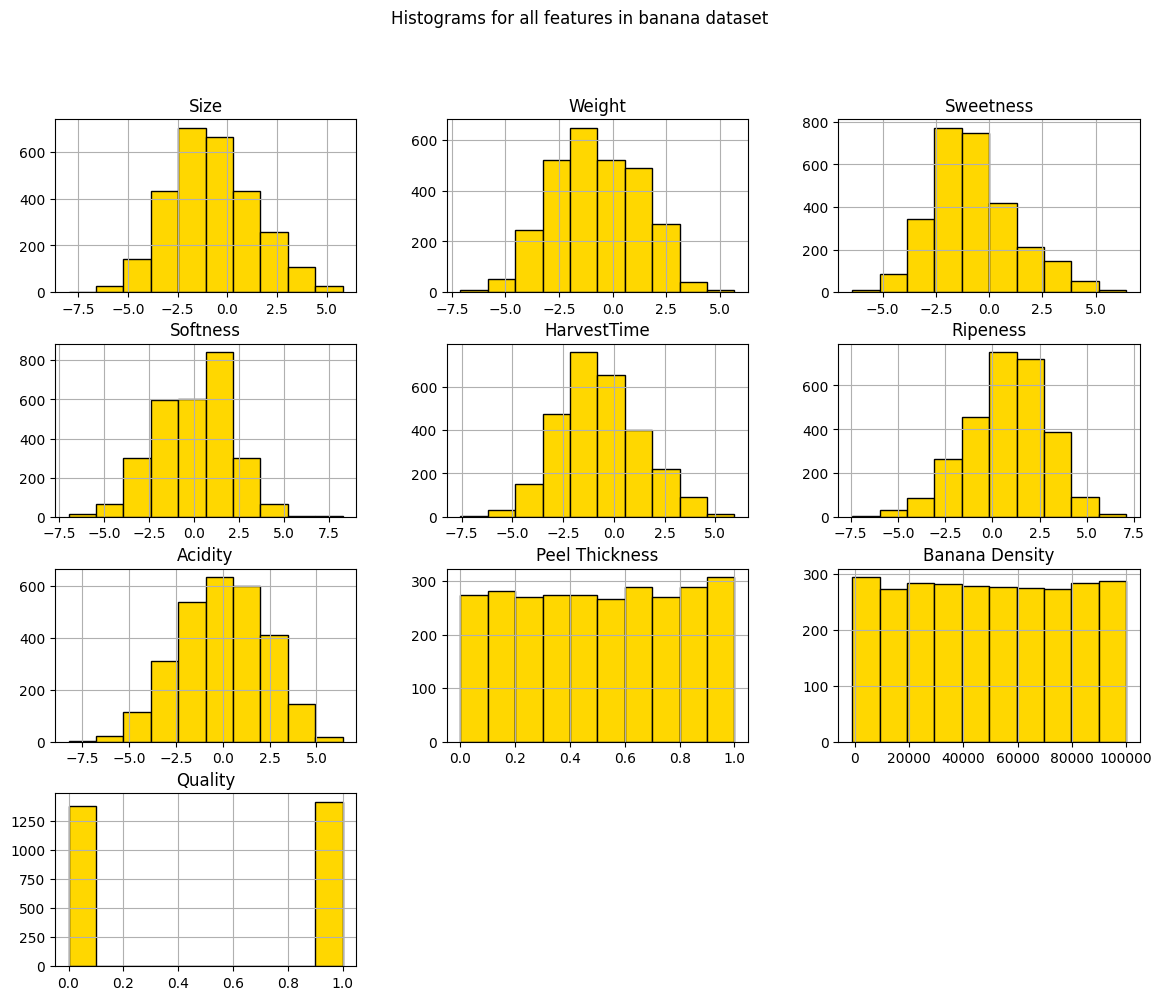

In [59]:
# Histograms to observe how the data is distributed
df.hist(figsize=(14, 11), bins=10, color = banana_colors[1], edgecolor ='black')
plt.suptitle("Histograms for all features in banana dataset")
plt.show()

**Comments**: The first 7 features has approximate normal distribution with the mean closes to 0. The last two have almost have equal bins for their flt distribution.

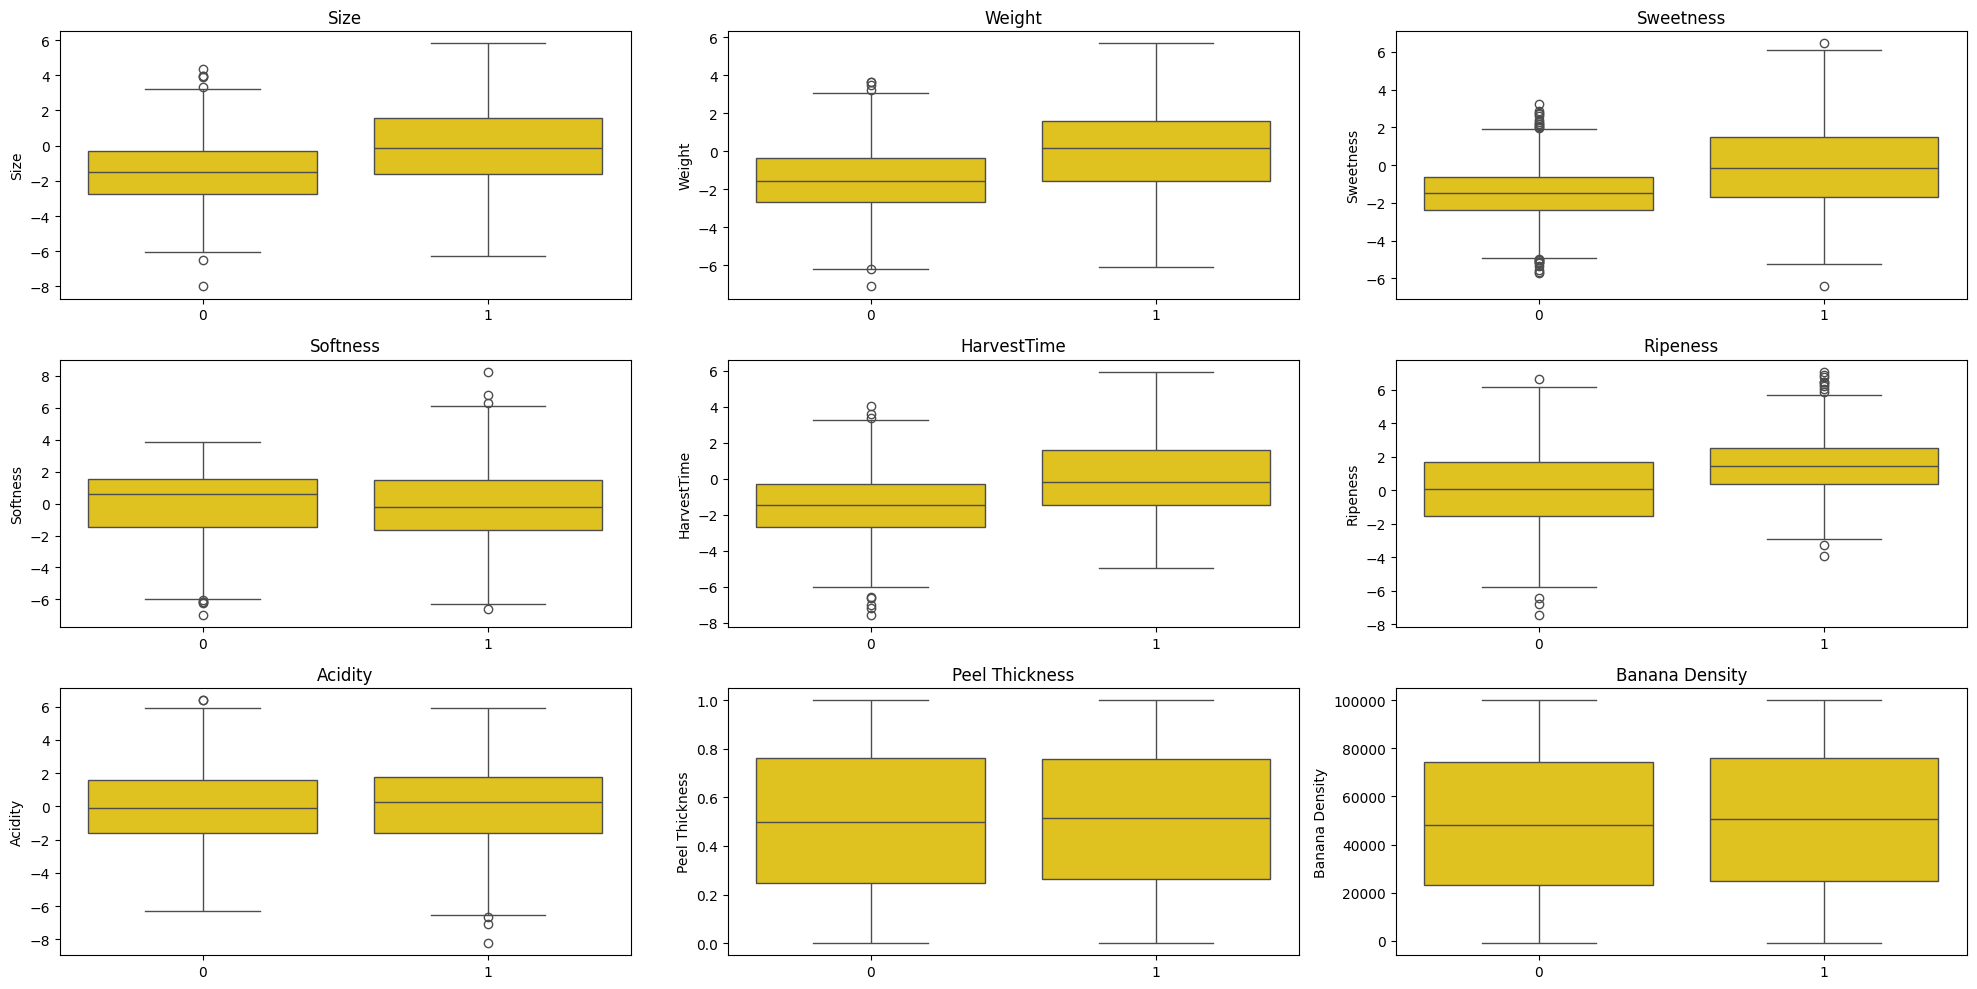

In [60]:
# Box plots to observe how bad and good bananas distributed on each feature
features = df.columns[:-1]
num_features = len(features)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10)) 
axes = axes.flatten()

# Create individual box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Quality', y=feature, data=df, ax=axes[i], color=banana_colors[1])
    axes[i].set_title(feature)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

**Comment**: Overall it seems quite difficult to distinguish two classes at each feature. Some features like 'Sweetness', 'HarvestTime', 'Ripeness' have noticable amount of outliers.

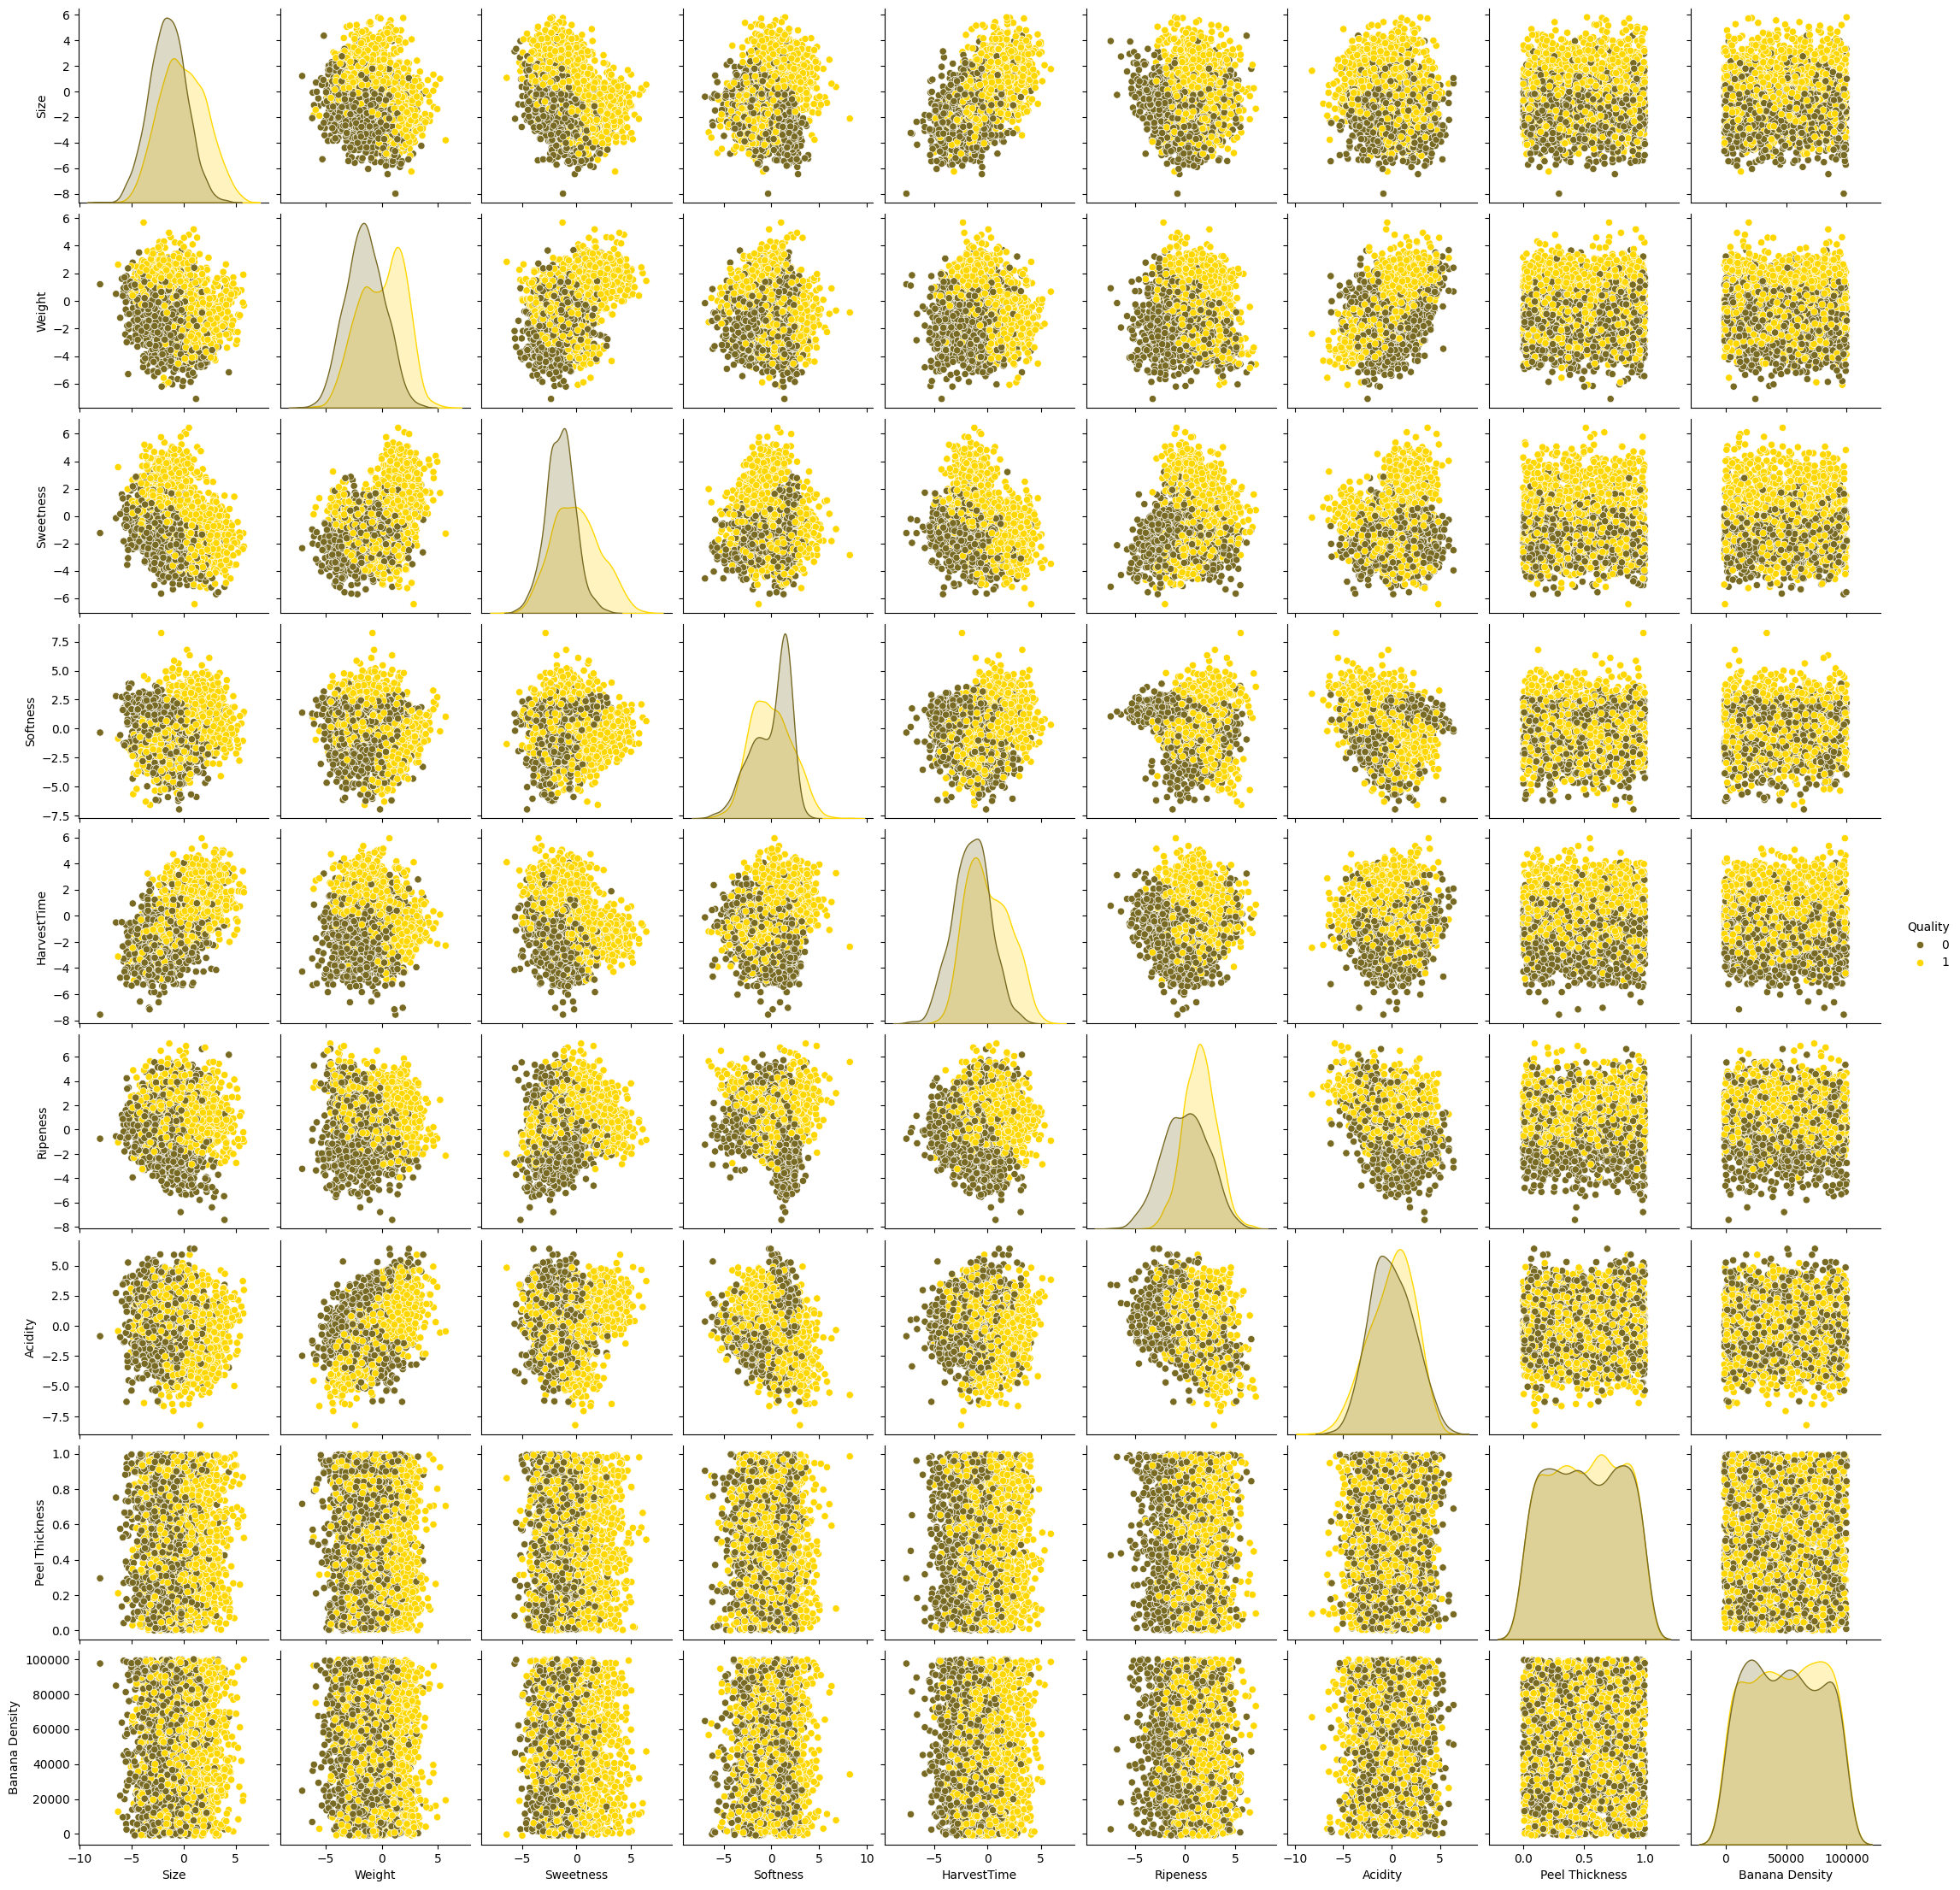

In [61]:
# Scatterplot with distinguishing colors to see if there is possible linearly separable pair
sns.pairplot(df, hue='Quality', palette=banana_colors)

**Comment**: Marking quality of banana on pair-wise plots shows us that it appear unlikely the target can be classified by a linear separating line. This could suggest that linear models like Perceptron, Adaline or Logistic Regression may not perform well on this dataset.

<Axes: >

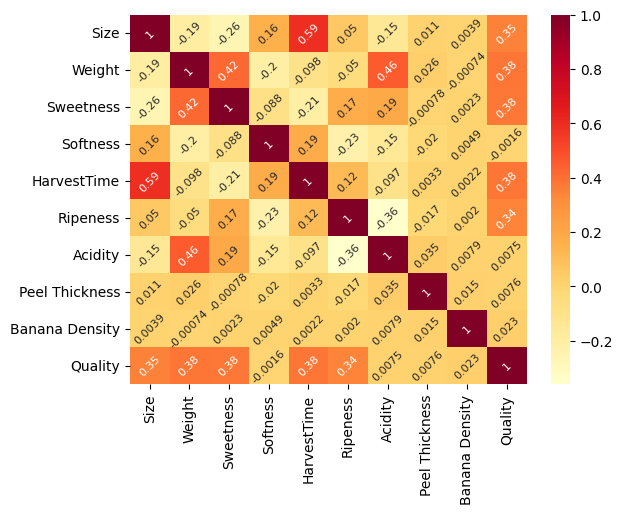

In [62]:
# Correlation matrix of the dataset:
sns.heatmap(df.corr(), annot=True, 
            annot_kws={'size': 8,'rotation': 45}, cmap="YlOrRd")

**Comment**: The dataset generally have very low correlation between pairs of feature. The most significant ones are ('Size' vs 'HarvestTime'), ('Weight' vs 'Acidity') og ('Weight' vs 'Sweetness')

/var/folders/tb/4p7pqq7j23n681mj_tfj2wl40000gn/T/ipykernel_7892/2647690016.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


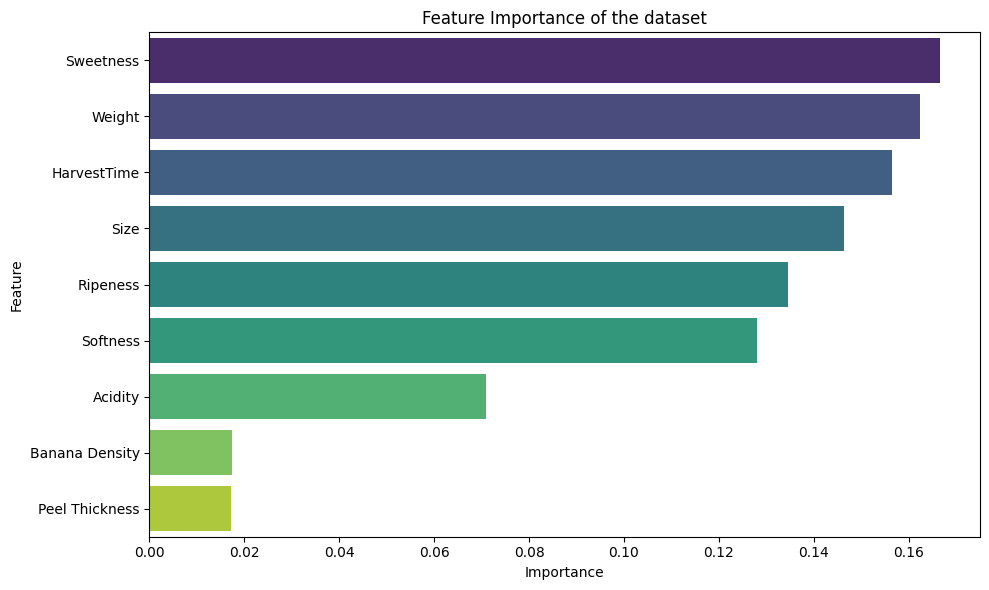

In [63]:
# Analysis the feature importance

# Train Random Forest:
X = df.drop(['Quality'], axis=1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance of the dataset')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Comment**: 'Acidity', 'Banana density' and 'Peel Thickness' are the least important features. They could be removed from the training data.

### Data cleaning and visualization

**Analysing if we should remove outliers**

In [64]:
#Function to evaluate general models without hyperparameters
def evaluate_models(model_list, df, remove_columns = None):
    if remove_columns == None:
        X = df.drop(['Quality'], axis = 1)
    else:
        X = df.drop(['Quality'] + remove_columns, axis=1)
    
    y = df['Quality']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model_accuracies = {}

    for model_class in model_list:
        model = model_class()               # Instantiate model
        model.fit(X_train, y_train)         # Train model
        y_pred = model.predict(X_test)      # Predict
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

        model_name = model.__class__.__name__
        model_accuracies[model_name] = accuracy  # Store name and accuracy

        print(f"{model_name} accuracy: {accuracy:.3f}\n")

    return model_accuracies

model_list = [Perceptron, LogisticRegression, SVC, 
              RandomForestClassifier, DecisionTreeClassifier, 
              KNeighborsClassifier]

In [65]:
#First, train and fit to see the models' performance without removing anything
sc = StandardScaler()
df.iloc[:,:-1] = sc.fit_transform(df.iloc[:,:-1])

original_models = evaluate_models(model_list, df)

Perceptron accuracy: 0.806

LogisticRegression accuracy: 0.886

SVC accuracy: 0.969

RandomForestClassifier accuracy: 0.961

DecisionTreeClassifier accuracy: 0.924

KNeighborsClassifier accuracy: 0.963



**Comment**: SVC yields the highest of 96.9% while RandomForestClassifier and KNN yields the same of 96.3%.

In [66]:
# Function removing outliers using Z_score:
def remove_outliers(df, threshold=3):
    df_clean = df.copy()
    numerical_cols = df_clean.select_dtypes(include=['number']).columns

    for col in numerical_cols:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        
        # Compute Z-score
        df_clean['Z_score'] = (df_clean[col] - mean) / std
        
        # Filter out outliers
        df_clean = df_clean[abs(df_clean['Z_score']) < threshold]

    df_clean = df_clean.drop(columns=['Z_score'])
    return df_clean

df_no_outliers = remove_outliers(df)

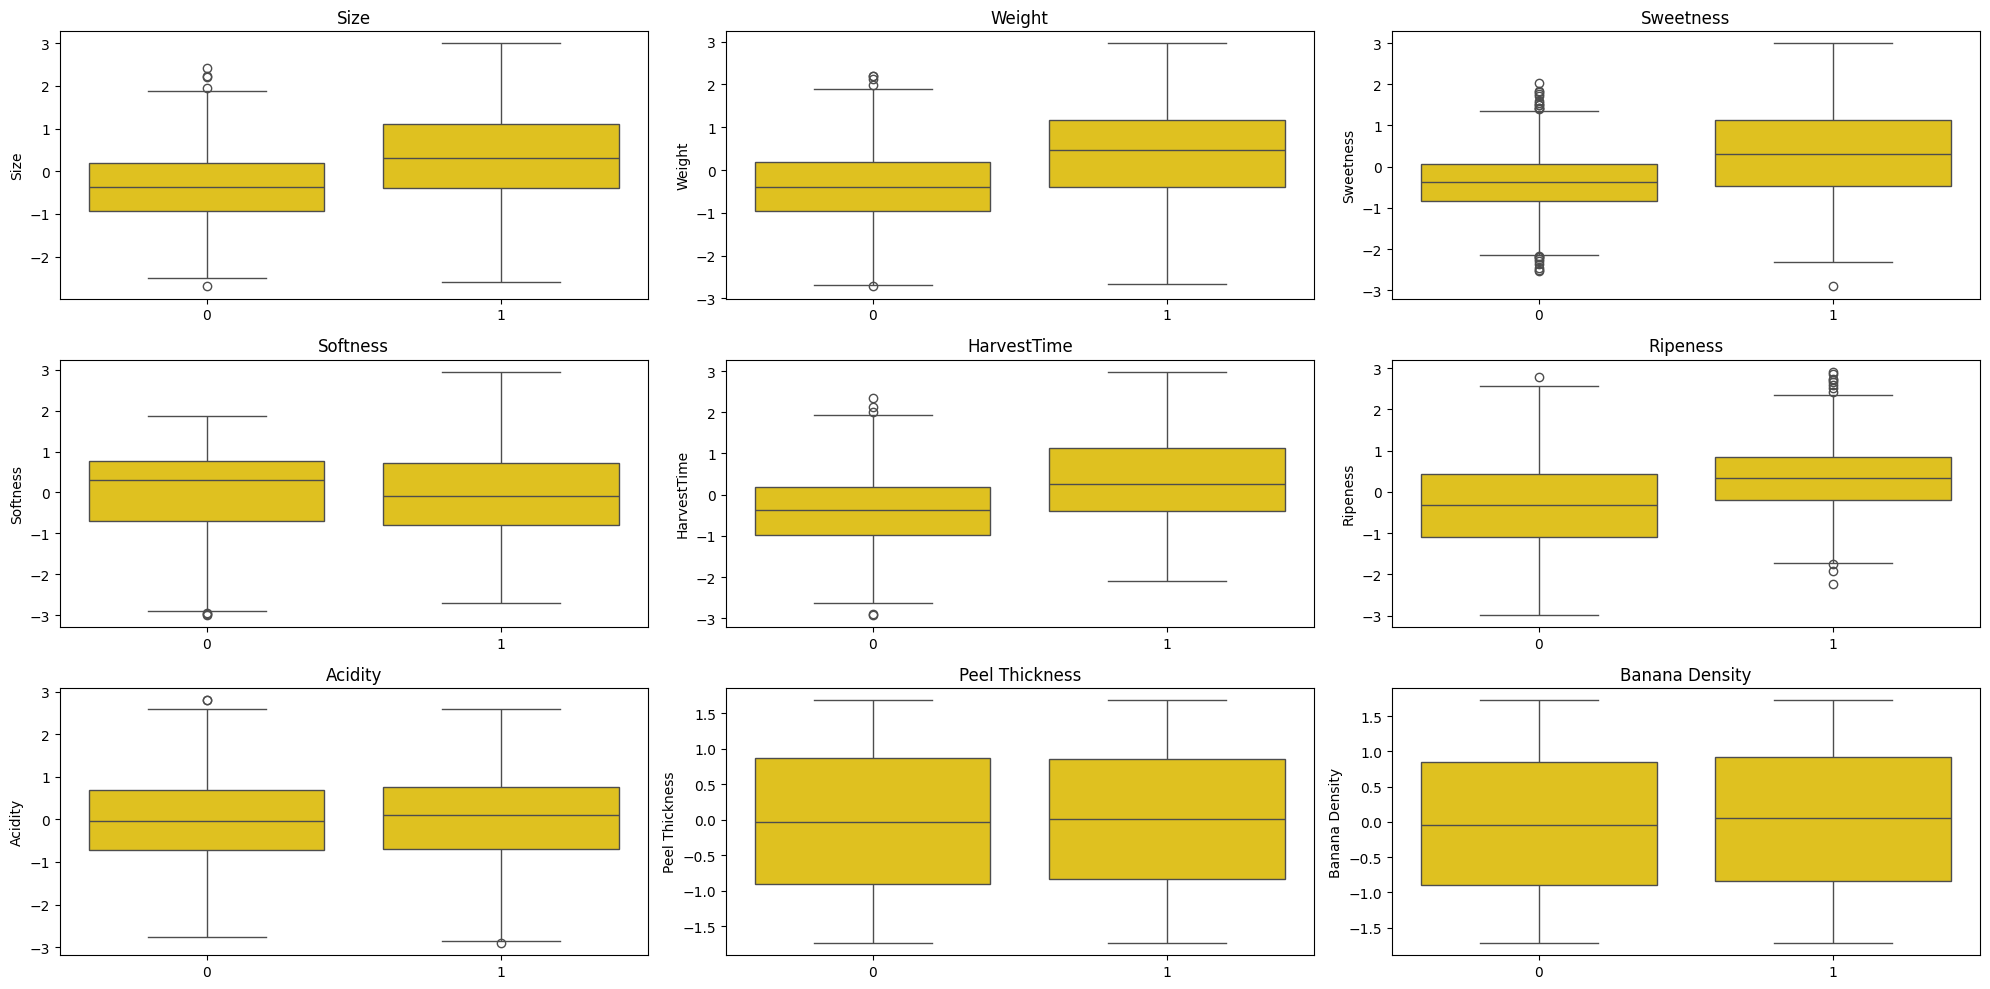

In [67]:
# Box plots after removing outliers:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10)) 
axes = axes.flatten()

# Create individual box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Quality', y=feature, data=df_no_outliers, 
                ax=axes[i], color=banana_colors[1])
    axes[i].set_title(feature)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

**Comments**: With threshold of 3 standard deviation, a few of outliers have been remove. We have tested the models with lower threshold, they results in lower accuracy. So threshold of 3 is not too strict but it can remove extreme outliers that led to fail in classification.

In [68]:
no_outliers_models = evaluate_models(model_list, df_no_outliers)

Perceptron accuracy: 0.787

LogisticRegression accuracy: 0.875

SVC accuracy: 0.983

RandomForestClassifier accuracy: 0.963

DecisionTreeClassifier accuracy: 0.909

KNeighborsClassifier accuracy: 0.972



**Comment**: SVC yields higher at now 98.3 % and both RandomForest and KNN increase in accuracy.

**Then we are curious of if the models perform better if we remove some features has small importance (noise to the dataset).**

In [69]:
# Models performance when the two least important removed:
cleaned_models = evaluate_models(model_list, df,
                                 ['Peel Thickness', 'Banana Density'])

Perceptron accuracy: 0.876

LogisticRegression accuracy: 0.888

SVC accuracy: 0.974

RandomForestClassifier accuracy: 0.963

DecisionTreeClassifier accuracy: 0.925

KNeighborsClassifier accuracy: 0.973



**Comment**: The accuracy drops when we removed some columns. We tried removing from 1 to 4 columns and all results in lower accuracy.

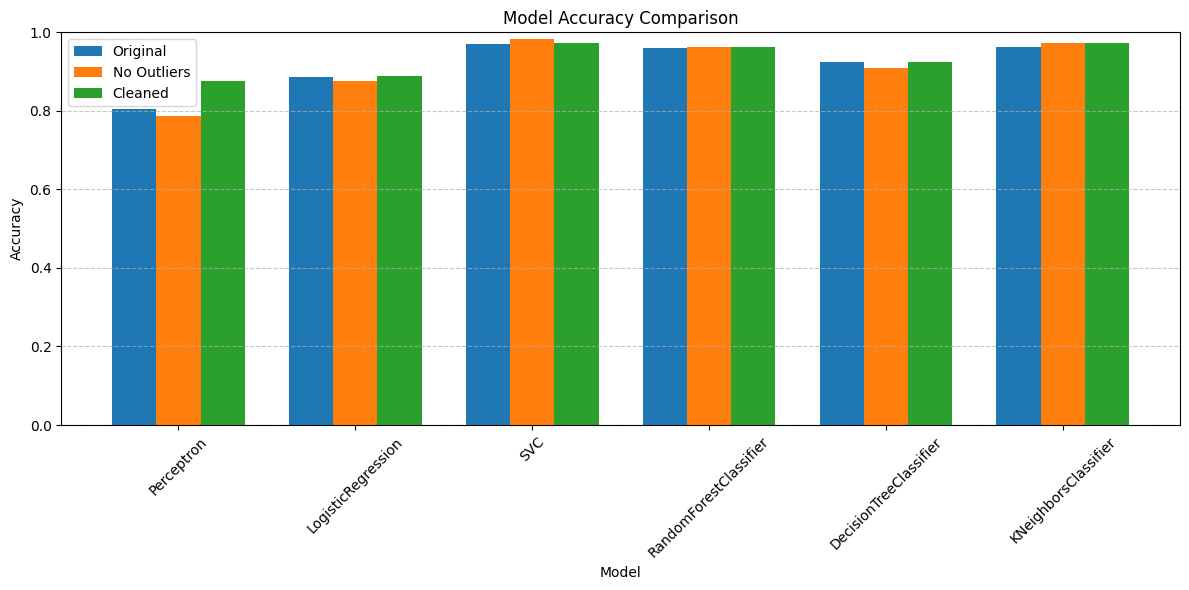

In [70]:
# Convert dictionaries to lists of model names and their accuracies
model_names = list(original_models.keys())
original_acc = [original_models[model] for model in model_names]
no_outliers_acc = [no_outliers_models[model] for model in model_names]
cleaned_acc = [cleaned_models[model] for model in model_names]

# Bar width and positions
x = np.arange(len(model_names))
bar_width = 0.25

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, original_acc, width=bar_width, label='Original')
plt.bar(x, no_outliers_acc, width=bar_width, label='No Outliers')
plt.bar(x + bar_width, cleaned_acc, width=bar_width, label='Cleaned')

# Labels and titles
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, model_names, rotation=45)
plt.ylim(0, 1)  # since accuracy is between 0 and 1
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Comment**: From exploration and this graph, we would focus on Support Vector Machine, Random Forest and KNNeighbors as effective models. We will also just remove extreme outliers that lies out of 3 standard deviations.

### DATA PREPROCESSING

This will include:
- Scaling: StandardScaler()
- Remove outliers
- Splitting training and test sets
- Remove 'Peel Thickness' and 'Banana Density': We have done the whole process without this step but received lower accuracy score so we decided to remove them.

In [71]:
# df was scaled before 
df = remove_outliers(df, threshold=3)

X = df.drop(['Quality', 'Peel Thickness', 'Banana Density'], axis = 1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

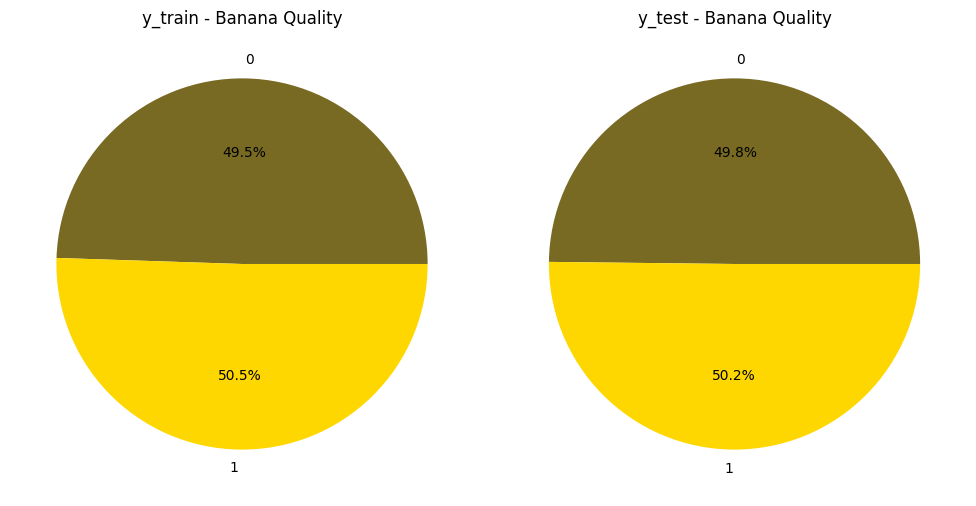

In [72]:
# Check the class proportions in both training and test sets
train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for y_train
axes[0].pie(train_dist, autopct='%1.1f%%', labels=train_dist.index, 
            colors=list(banana_colors.values()))
axes[0].set_title('y_train - Banana Quality')

# Pie chart for y_test
axes[1].pie(test_dist, autopct='%1.1f%%', labels=test_dist.index, 
            colors=list(banana_colors.values()))
axes[1].set_title('y_test - Banana Quality')

plt.tight_layout()
plt.show()

### EVALUATING MODELS AND PARAMETERS

In [73]:
def manual_search_evaluate(model_class, param_grid, X_train, X_test, 
                               y_train, y_test, scoring='accuracy', cv=5):
    # Initialize variables to store values after each iteration
    best_score = 0
    best_params = None
    best_model = None
    
    # Generate all combinations of parameters
    keys, values = zip(*param_grid.items())
    param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    # Loop over each combination of parameters
    for params in param_combinations:
        scores = []
        # Cross-validation
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        
        # Perform cross-validation
        for train_idx, val_idx in skf.split(X_train, y_train):
            # Split training data into training and validation folds
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Train model with parameter combination:
            model = model_class(**params)
            model.fit(X_fold_train, y_fold_train)
            
            # Predict on validation set and compute accuracy
            y_val_pred = model.predict(X_fold_val)
            score = accuracy_score(y_fold_val, y_val_pred)
            scores.append(score)
        
        # Average cross-validation score for the param combination
        avg_score = np.mean(scores)
        
        # Update best score and best params
        if avg_score > best_score:
            best_score = avg_score
            best_params = params

    # Train best model on full training set
    best_model = model_class(**best_params)
    best_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Best Parameters: {best_params}")
    print(f"Test Accuracy: {acc:.3f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {model_class.__name__}")
    plt.show()
    
    return best_model, acc, cm

**SUPPORT VECTOR MACHINE**

Observed from the scatterplot that it seems very difficult to classify classes from linear separating line so we do not use Linear SVC

Best Parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
Test Accuracy: 0.989


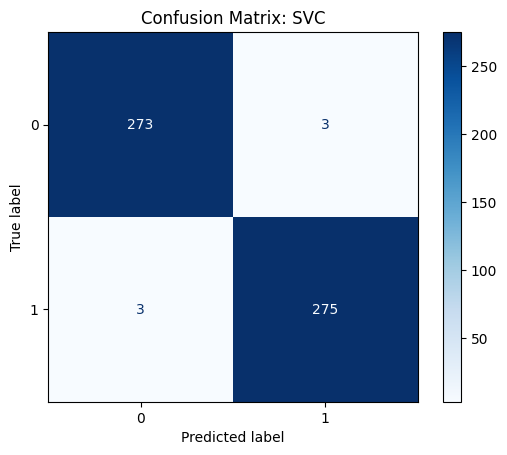

In [74]:
# RBF KERNEL SVM
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}

rbf_SVC = manual_search_evaluate(SVC, param_grid_rbf, X_train, X_test, y_train, y_test)

**Comment**: Submission score on Kaggle: 0.98541 - a bit overfitting.

Best Parameters: {'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma': 'scale', 'coef0': 0.1}
Test Accuracy: 0.989


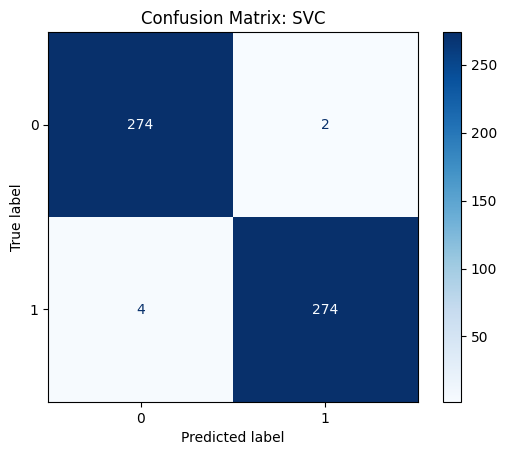

In [75]:
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.1, 1],
    'degree': [2, 3],
    'gamma': ['scale', 0.01],
    'coef0': [0.0, 0.1]
}
poly_SVC = manual_search_evaluate(SVC, param_grid_poly, X_train, X_test, y_train, y_test)

**Comment**: Submission score on Kaggle: 0.98541

Best Parameters: {'kernel': 'sigmoid', 'C': 1, 'gamma': 0.01, 'coef0': 0.0}
Test Accuracy: 0.868


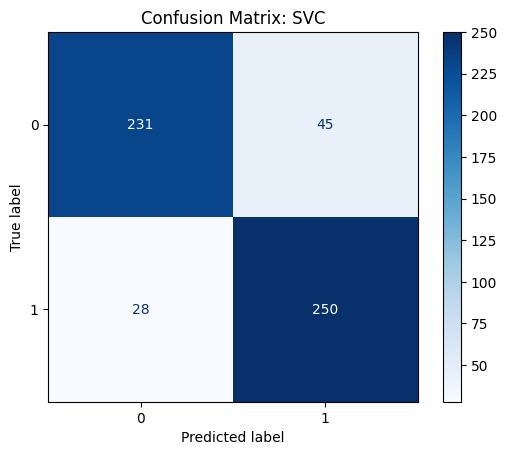

In [76]:
param_grid_sigmoid = {
    'kernel': ['sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01],
    'coef0': [0.0, 0.1]
}
sigmoid_SVC = manual_search_evaluate(SVC, param_grid_sigmoid, X_train, X_test, y_train, y_test)

**Comment**: Submission score on Kaggle - 0.84811

**RANDOM FOREST**

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}
Test Accuracy: 0.968


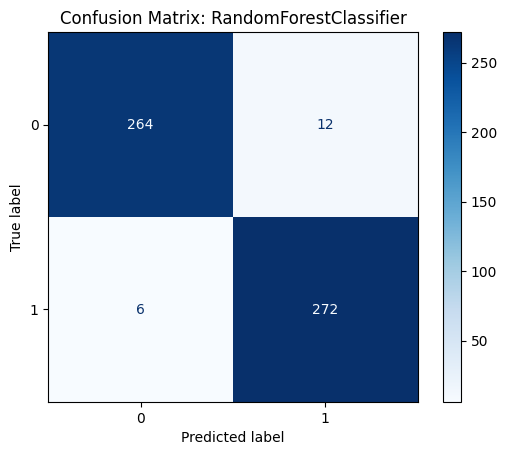

In [77]:
param_grid_rf = {
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5],       # Min samples to split an internal node
    'min_samples_leaf': [1, 2],        # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
}

best_rf = manual_search_evaluate(RandomForestClassifier, param_grid_rf, X_train, X_test, y_train, y_test)

**Comment**: Submission score on Kaggle: 0.96233

**KNN**

Best Parameters: {'n_neighbors': 7, 'metric': 'euclidean', 'p': 1}
Test Accuracy: 0.980


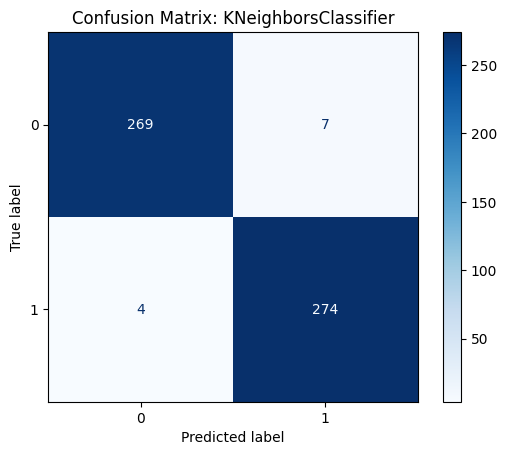

In [78]:
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 6, 7],           # Number of neighbors to use
    'metric': ['euclidean', 'manhattan', 'minkowski'],     # Distance metrics
    'p': [1, 2]                               # Power parameter for Minkowski
}

best_knn = manual_search_evaluate(KNeighborsClassifier, param_grid_knn, X_train, X_test, y_train, y_test)

**Comment**: Submission score on Kaggle: 0.98177

In [82]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Peel Thickness', 'Banana Density'], axis =1)
df_test = sc.fit_transform(df_test)
y_test_kaggle = rbf_SVC[0].predict(df_test)
y_test_kaggle = pd.DataFrame(y_test_kaggle, columns=["Quality"])
y_test_kaggle.index.name = "ID"
y_test_kaggle[['Quality']].to_csv("submission6.csv")

/Users/dunhul/Library/CloudStorage/OneDrive-NorwegianUniversityofLifeSciences/VÅR 2025/DAT200/CA3_DAT200/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


So far RBF-kernel Support Vector Machine is the best model with C=10 and gamma=0.1.